# CPE 595 Homework 2 -Linear Regression and Logistic Regression


In [7]:
# Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(19)


### Question 1. Hands-on Linear Regression

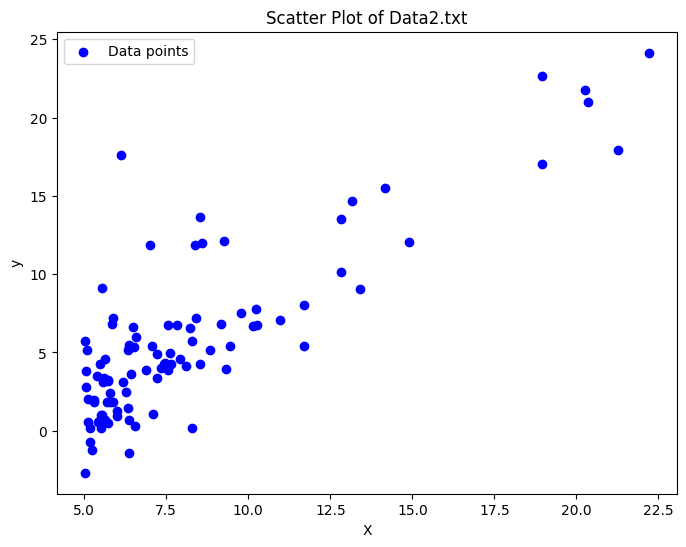

In [8]:
# Load Dataset
data = np.loadtxt('data2.txt', delimiter=',')  
X = data[:, 0]  # Feature
y = data[:, 1]  # Target

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title("Scatter Plot of Data2.txt")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Intercept (w0): -3.8958
Slope (w1): 1.1930


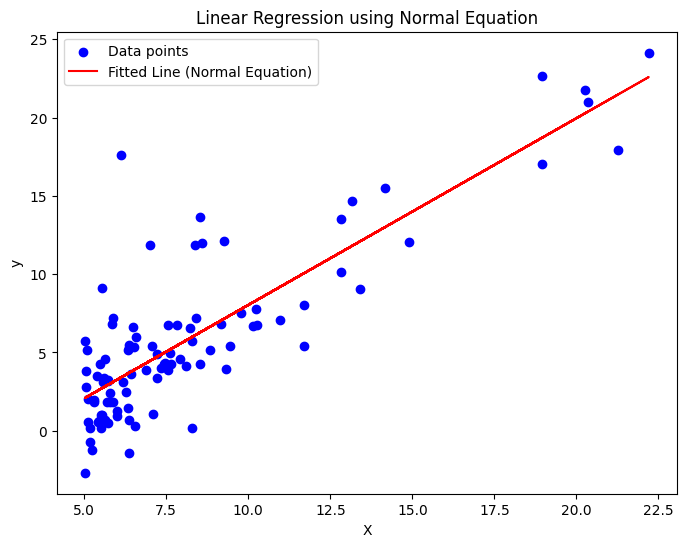

In [9]:
# Normal equation

# Add intercept term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (intercept)

# Apply Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Display the coefficients
print(f"Intercept (w0): {theta_best[0]:.4f}")
print(f"Slope (w1): {theta_best[1]:.4f}")

# Plot the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta_best), color='red', label='Fitted Line (Normal Equation)')
plt.title("Linear Regression using Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [10]:
# Split dataset between training and testing

# Shuffle and split the data
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 77
Testing set size: 20


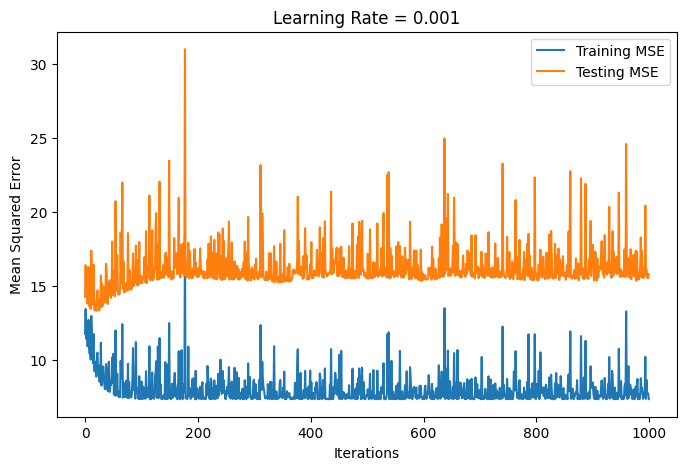

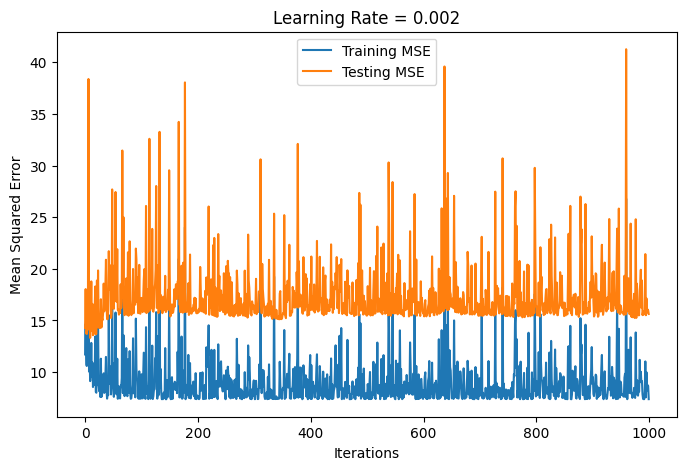

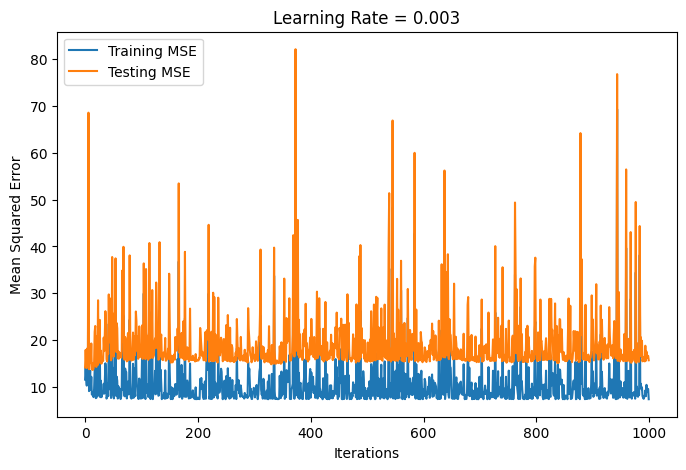

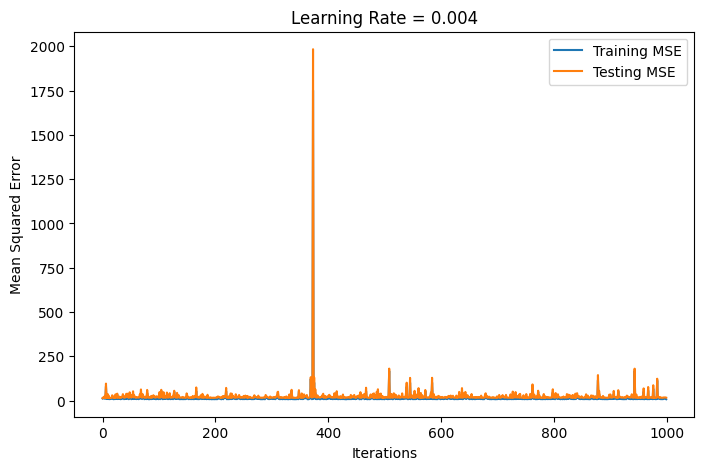

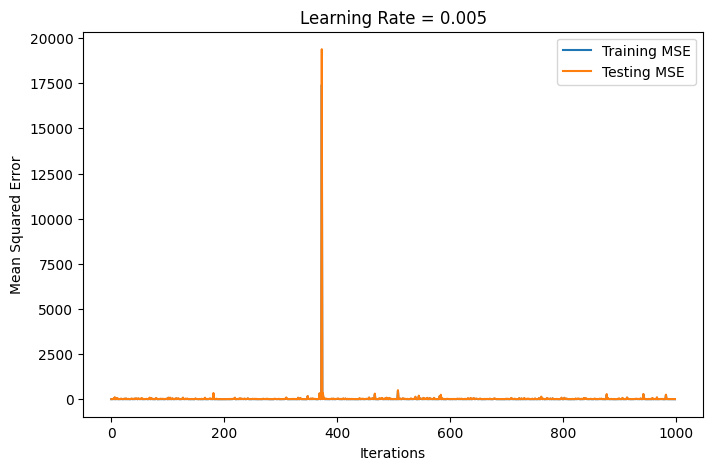

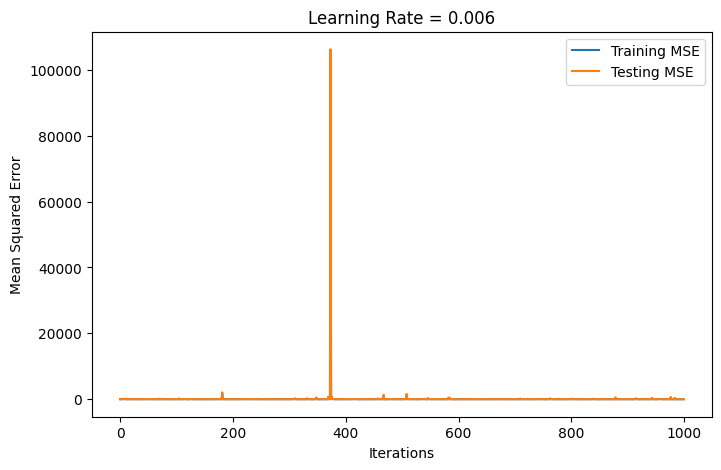

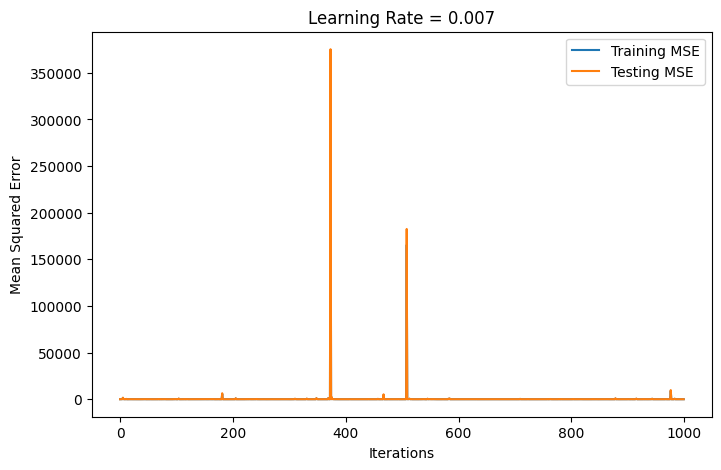

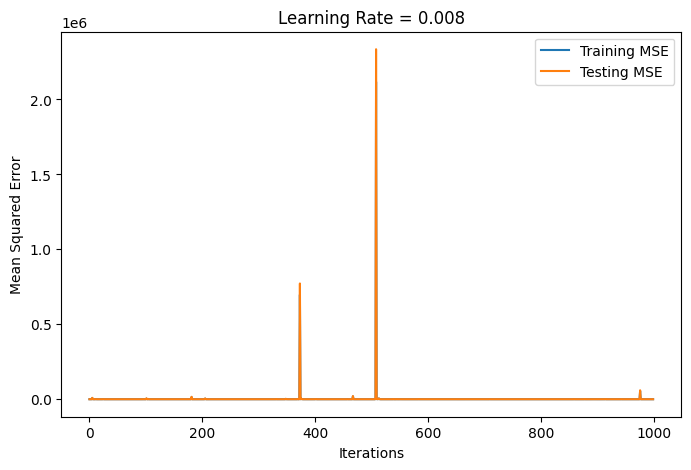

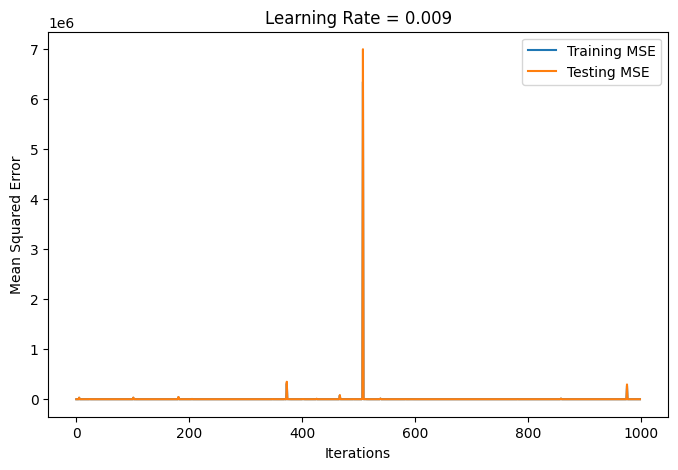

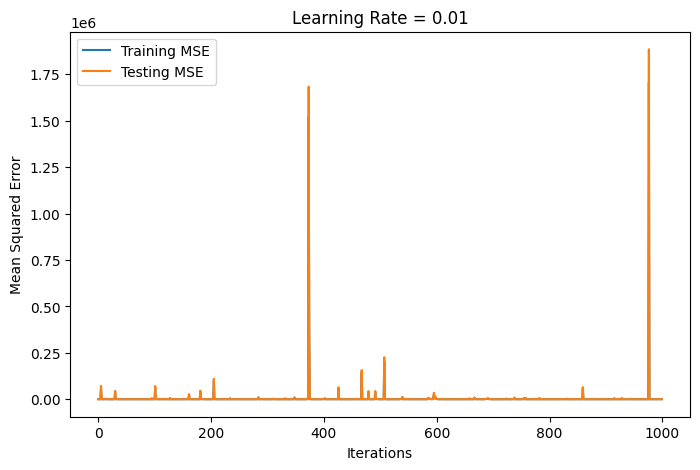

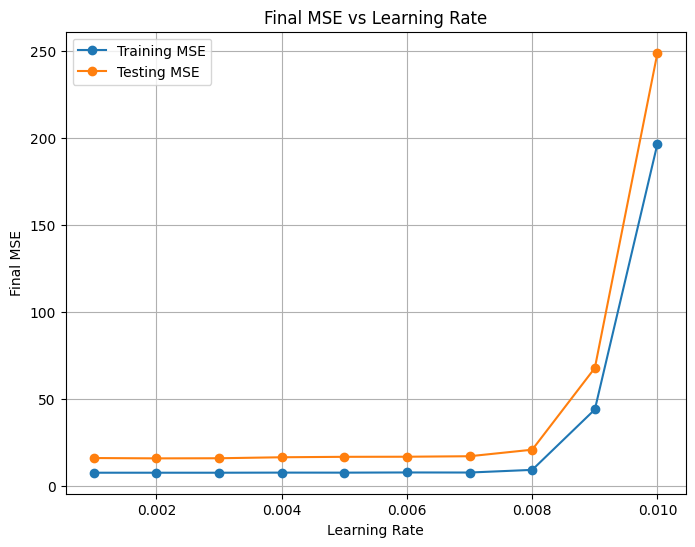

Best Learning Rate: 0.002 with Testing MSE: 15.6272


In [11]:
#SGD Algorithm
# try all learning rates and plot the MSE vs Iterations for each learning rate to find the best one

# Learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Store final MSE for comparison
final_mse_train = []
final_mse_test = []

# SGD Parameters
n_iterations = 1000  # Maximum number of iterations
cost_threshold = 1e-6  # Cost function threshold for early stopping
m = X_train.shape[0]  # Number of samples

# Loop over learning rates
for lr in learning_rates:
    # Initialize weights
    np.random.seed(19)
    theta_sgd = np.random.randn(2, 1)
    
    # Lists to store MSE per iteration
    mse_train = []
    mse_test = []

    # SGD Loop
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_train[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
            theta_sgd = theta_sgd - lr * gradients

        # Calculate MSE for training and testing
        y_train_pred = X_train.dot(theta_sgd)
        y_test_pred = X_test.dot(theta_sgd)
        mse_current = np.mean((y_train - y_train_pred.flatten())**2)
        mse_train.append(mse_current)
        mse_test.append(np.mean((y_test - y_test_pred.flatten())**2))

        # Check for early stopping (cost function threshold)
        if iteration > 0 and abs(mse_train[-2] - mse_current) < cost_threshold:
            print(f"Early stopping at iteration {iteration} for learning rate {lr}")
            break

    # Store final MSE
    final_mse_train.append(mse_train[-1])
    final_mse_test.append(mse_test[-1])

    # Plot MSE vs Iterations for each learning rate
    plt.figure(figsize=(8, 5))
    plt.plot(mse_train, label='Training MSE')
    plt.plot(mse_test, label='Testing MSE')
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

# Plot Final MSE vs Learning Rate
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, final_mse_train, marker='o', label='Training MSE')
plt.plot(learning_rates, final_mse_test, marker='o', label='Testing MSE')
plt.title("Final MSE vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Final MSE")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best learning rate (lowest test MSE)
best_lr_index = np.argmin(final_mse_test)
best_lr = learning_rates[best_lr_index]
print(f"Best Learning Rate: {best_lr} with Testing MSE: {final_mse_test[best_lr_index]:.4f}")



SGD Observations 
- Best Learning Rate: 0.002 with Testing MSE: 15.6272
- since SGD updates model parameters after each training sample, it leads to frequent updates and more randomness in the optimization process.
- a learning rate of 0.002 allowed for relatively stable updates. A lower rate might have slowed down convergence while a higher rate casued excessive fluctuations.
- the MSE shows the SGD learned rather effectively, but did not reach the lowest possible error. I suspect this is becuase of the stochastic nature of this model, which would naturely lead to instability

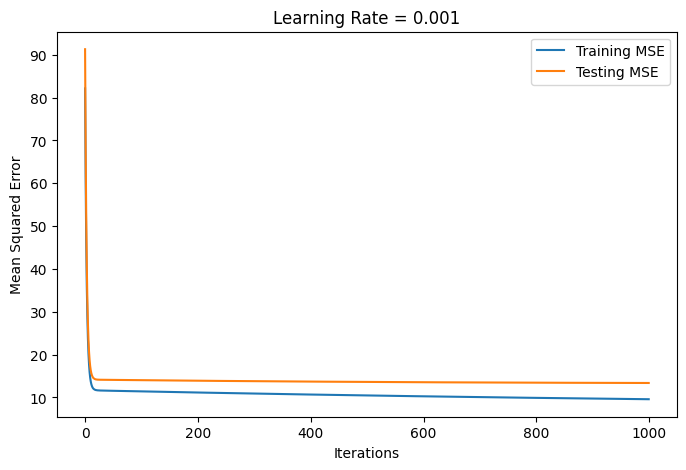

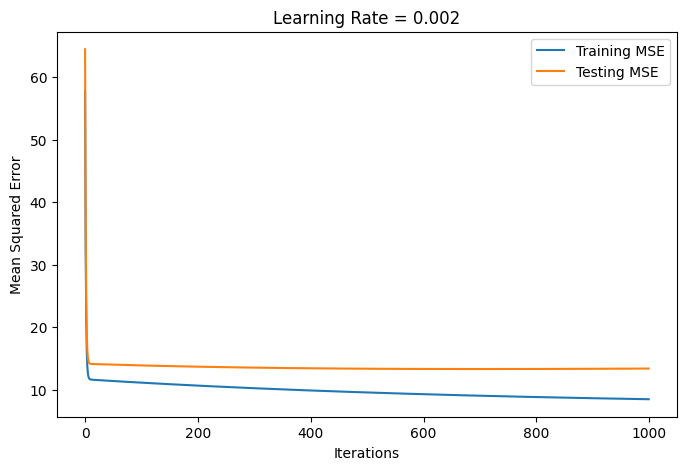

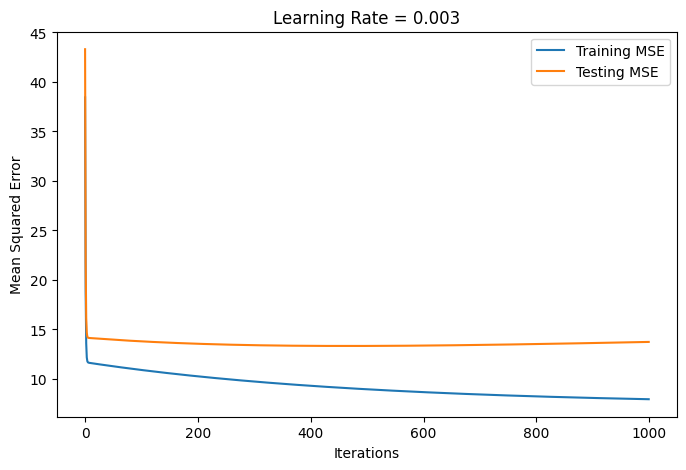

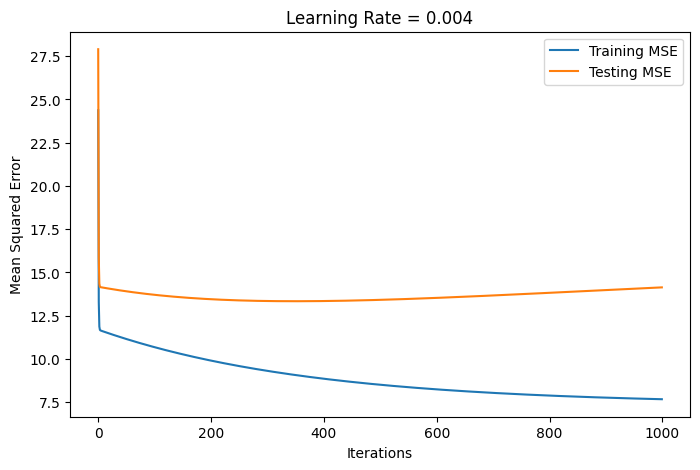

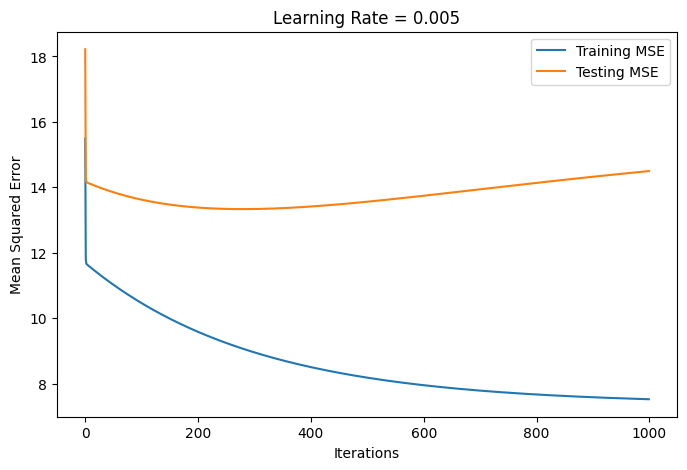

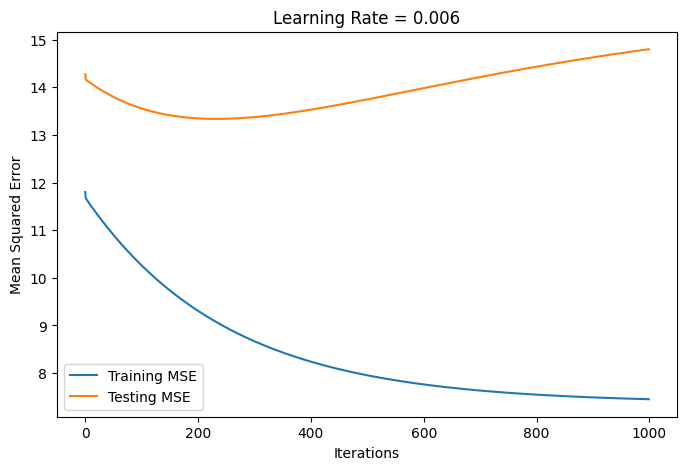

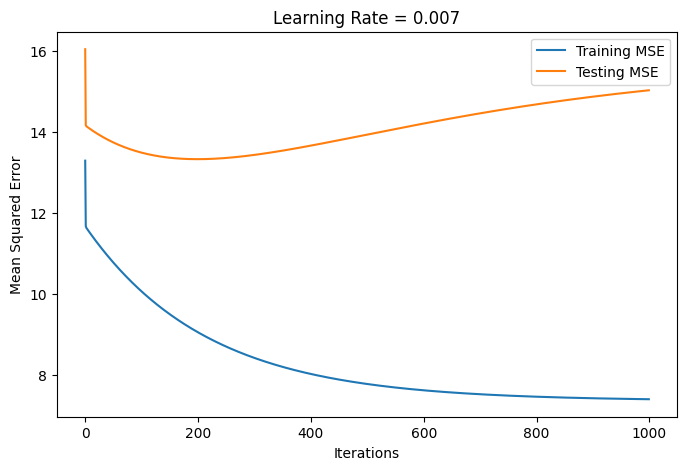

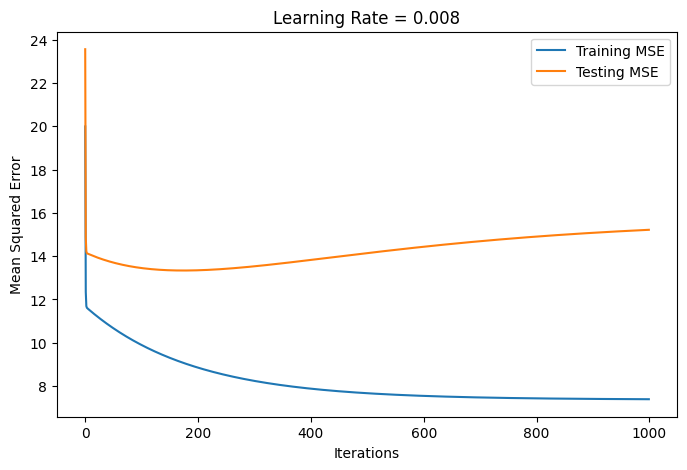

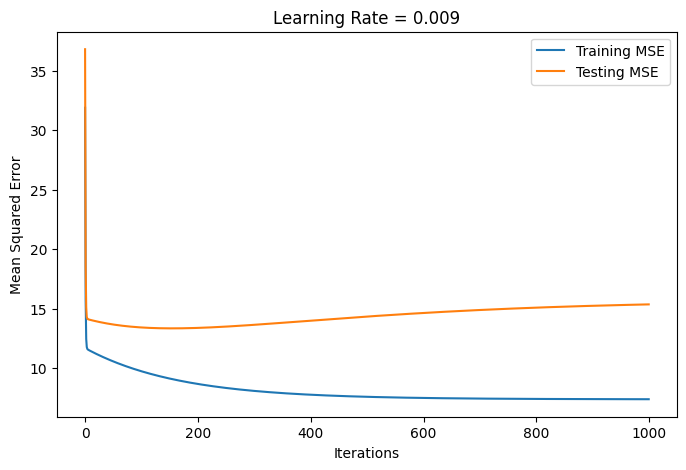

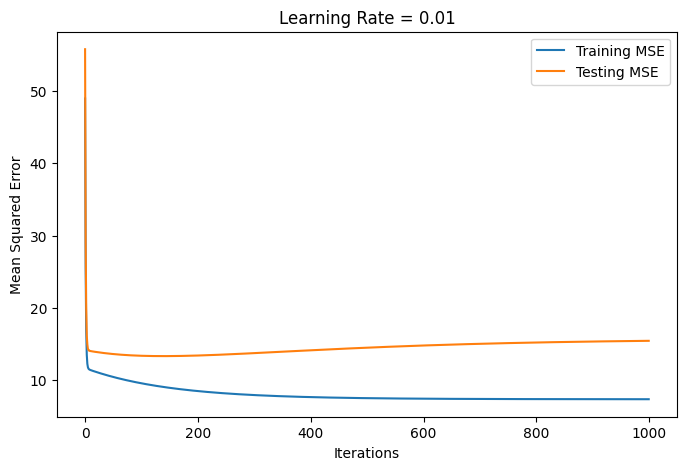

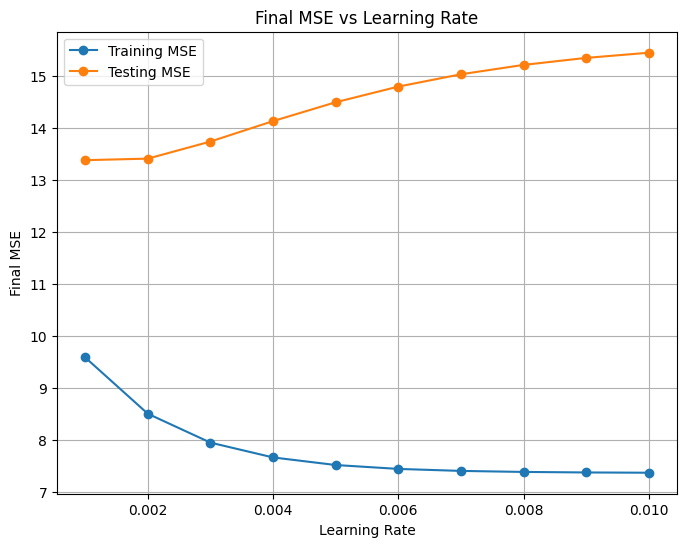

Best Learning Rate: 0.001 with Testing MSE: 13.3841


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# BGD Algorithm
# Try all learning rates and plot the MSE vs Iterations for each learning rate to find the best one

# Learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Store final MSE for comparison
final_mse_train_bgd = []
final_mse_test_bgd = []

# BGD Parameters
n_iterations = 1000  # Maximum number of iterations
cost_threshold = 1e-6  # Cost function threshold for early stopping
m = X_train.shape[0]  # Number of samples

# Loop over learning rates
for lr in learning_rates:
    # Initialize weights
    np.random.seed(19)
    theta_bgd = np.random.randn(2, 1)
    
    # Lists to store MSE per iteration
    mse_train_bgd = []
    mse_test_bgd = []

    # BGD Loop
    for iteration in range(n_iterations):
        gradients = (2/m) * X_train.T.dot(X_train.dot(theta_bgd) - y_train.reshape(-1, 1))
        theta_bgd = theta_bgd - lr * gradients

        # Calculate MSE for training and testing
        y_train_pred = X_train.dot(theta_bgd)
        y_test_pred = X_test.dot(theta_bgd)
        mse_current = np.mean((y_train - y_train_pred.flatten())**2)
        mse_train_bgd.append(mse_current)
        mse_test_bgd.append(np.mean((y_test - y_test_pred.flatten())**2))

        # Check for early stopping (cost function threshold)
        if iteration > 0 and abs(mse_train_bgd[-2] - mse_current) < cost_threshold:
            print(f"Early stopping at iteration {iteration} for learning rate {lr}")
            break

    # Store final MSE
    final_mse_train_bgd.append(mse_train_bgd[-1])
    final_mse_test_bgd.append(mse_test_bgd[-1])

    # Plot MSE vs Iterations for each learning rate
    plt.figure(figsize=(8, 5))
    plt.plot(mse_train_bgd, label='Training MSE')
    plt.plot(mse_test_bgd, label='Testing MSE')
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

# Plot Final MSE vs Learning Rate
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, final_mse_train_bgd, marker='o', label='Training MSE')
plt.plot(learning_rates, final_mse_test_bgd, marker='o', label='Testing MSE')
plt.title("Final MSE vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Final MSE")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best learning rate (lowest test MSE)
best_lr_index_bgd = np.argmin(final_mse_test_bgd)
best_lr_bgd = learning_rates[best_lr_index_bgd]
print(f"Best Learning Rate: {best_lr_bgd} with Testing MSE: {final_mse_test_bgd[best_lr_index_bgd]:.4f}")


BGD Observations 
- Best Learning Rate: 0.001 with Testing MSE: 13.3841
- since BGD makes significantly fewer updates than SGD, a lower learning rate helps maintain stability
- As shown by the graphs. a higher learning rate caused more divergence
- Final Testing MSE of 13.3841 shows that BGD reached a lower error than SGD, making it the more accurate option in this case.


Key Takeaways
- BGD had the best accuracy, since its MSE was lower compared to SGD
- SGD had a highter convergence speed compared to BGD because it provides faster updates per iteration
- BGD was better in terms of stability becuase it had fewer fluctuations, and thus a smoother descent
- Overall SGD was more efficient becuase it did not need to do a full pass through of the dataset

### Question 2 Logistic Regression Practice

First, load and modify dataset

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "wdbc.data"
column_names = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean",
    "Smoothness_mean", "Compactness_mean", "Concavity_mean", "Concave_points_mean",
    "Symmetry_mean", "Fractal_dimension_mean", "Radius_se", "Texture_se", "Perimeter_se",
    "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se", "Concave_points_se",
    "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst", "Perimeter_worst",
    "Area_worst", "Smoothness_worst", "Compactness_worst", "Concavity_worst",
    "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

# Read the dataset
data = pd.read_csv(file_path, header=None, names=column_names)

# Drop ID column since it's not a feature
data.drop(columns=["ID"], inplace=True)

# Convert categorical labels ('M' = Malignant, 'B' = Benign) to numeric (1 = Malignant, 0 = Benign)
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

# Split features and labels
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (455, 30), Testing set: (114, 30)


Then, train logistic regression (control group)

In [19]:
# Train a logistic regression model without regularization
log_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Logistic Regression Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred))


Baseline Logistic Regression Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Next, perform logistic regression with regularization (L1/L2)

In [23]:
# Train Logistic Regression with Cross-Validation to find the best lambda
log_reg_cv_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=100)
log_reg_cv_l2 = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=100)

# Fit models
log_reg_cv_l1.fit(X_train, y_train)
log_reg_cv_l2.fit(X_train, y_train)

# Predictions
y_pred_l1 = log_reg_cv_l1.predict(X_test)
y_pred_l2 = log_reg_cv_l2.predict(X_test)

# Accuracy scores
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print(f"L1 Regularized Logistic Regression Accuracy: {accuracy_l1:.4f}")
print(f"L2 Regularized Logistic Regression Accuracy: {accuracy_l2:.4f}")

# Number of selected features (non-zero coefficients)
num_features_l1 = np.sum(log_reg_cv_l1.coef_ != 0)
num_features_l2 = np.sum(log_reg_cv_l2.coef_ != 0)

print(f"Number of features selected (L1): {num_features_l1}")
print(f"Number of features selected (L2): {num_features_l2}")


C:\Users\Jcwil\anaconda3\envs\CPE595\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Jcwil\anaconda3\envs\CPE595\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Jcwil\anaconda3\envs\CPE595\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


L1 Regularized Logistic Regression Accuracy: 0.9737
L2 Regularized Logistic Regression Accuracy: 0.9737
Number of features selected (L1): 11
Number of features selected (L2): 30


C:\Users\Jcwil\anaconda3\envs\CPE595\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finally, visualize

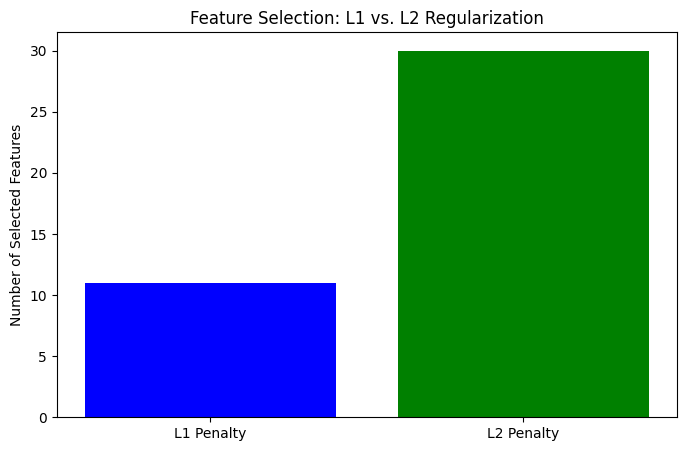

In [24]:
# Visualizing Feature Selection
plt.figure(figsize=(8,5))
plt.bar(["L1 Penalty", "L2 Penalty"], [num_features_l1, num_features_l2], color=["blue", "green"])
plt.ylabel("Number of Selected Features")
plt.title("Feature Selection: L1 vs. L2 Regularization")
plt.show()


### Results Discussion
The comparison of the three logistic regression models shows that both L1 (Lasso) and L2 (Ridge) regularization improved accuracy to 97.37%, compared to the baseline model's accuracy of 93.86%. While L2 retained all 30 features, L1 selected only 11 key features, demonstrating its ability to eliminate irrelevant variables while maintaining performance. The baseline model likely suffered from slight overfitting, as regularization helped improve generalization to new data. Since L1 and L2 achieved the same accuracy, the primary difference lies in feature selection, where L1 simplifies the model while L2 retains all features but reduces overfitting.

### Insights Discussion
Insights from these results suggest that many features in the dataset are redundant, as L1 regularization successfully reduced the feature set by nearly two-thirds without impacting accuracy. This indicates that only a subset of the original features significantly contributes to breast cancer classification, which is valuable for medical diagnostics by identifying the most important biomarkers. On the other hand, L2 regularization demonstrates that all features contribute some predictive power, though not equally. The improvement in accuracy with both regularization techniques highlights the importance of controlling model complexity to improve generalization and avoid overfitting.